# 34.
[1차] 다트 게임 2018 KAKAO BLIND RECRUITMENT

https://school.programmers.co.kr/learn/courses/30/lessons/17682


**문제 설명**

    카카오톡에 뜬 네 번째 별! 심심할 땐? 카카오톡 게임별~
        카카오톡 게임별의 하반기 신규 서비스로 다트 게임을 출시하기로 했다. 다트 게임은 다트판에 다트를 세 차례 던져 그 점수의 합계로 실력을 겨루는 게임으로, 모두가 간단히 즐길 수 있다.
    갓 입사한 무지는 코딩 실력을 인정받아 게임의 핵심 부분인 점수 계산 로직을 맡게 되었다. 다트 게임의 점수 계산 로직은 아래와 같다.

    다트 게임은 총 3번의 기회로 구성된다.
    각 기회마다 얻을 수 있는 점수는 0점에서 10점까지이다.
    점수와 함께 Single(S), Double(D), Triple(T) 영역이 존재하고 각 영역 당첨 시 점수에서 1제곱, 2제곱, 3제곱 (점수1 , 점수2 , 점수3 )으로 계산된다.
    옵션으로 스타상(*) , 아차상(#)이 존재하며 스타상(*) 당첨 시 해당 점수와 바로 전에 얻은 점수를 각 2배로 만든다. 아차상(#) 당첨 시 해당 점수는 마이너스된다.
    스타상(*)은 첫 번째 기회에서도 나올 수 있다. 이 경우 첫 번째 스타상(*)의 점수만 2배가 된다. (예제 4번 참고)
    스타상(*)의 효과는 다른 스타상(*)의 효과와 중첩될 수 있다. 이 경우 중첩된 스타상(*) 점수는 4배가 된다. (예제 4번 참고)
    스타상(*)의 효과는 아차상(#)의 효과와 중첩될 수 있다. 이 경우 중첩된 아차상(#)의 점수는 -2배가 된다. (예제 5번 참고)
    Single(S), Double(D), Triple(T)은 점수마다 하나씩 존재한다.
    스타상(*), 아차상(#)은 점수마다 둘 중 하나만 존재할 수 있으며, 존재하지 않을 수도 있다.
    0~10의 정수와 문자 S, D, T, *, #로 구성된 문자열이 입력될 시 총점수를 반환하는 함수를 작성하라.
    
 
**입력 형식**

    "점수|보너스|[옵션]"으로 이루어진 문자열 3세트.
    예) 1S2D*3T

    점수는 0에서 10 사이의 정수이다.
    보너스는 S, D, T 중 하나이다.
    옵선은 *이나 # 중 하나이며, 없을 수도 있다.


**출력 형식**

    3번의 기회에서 얻은 점수 합계에 해당하는 정수값을 출력한다.
    예) 37


**입출력 예제**

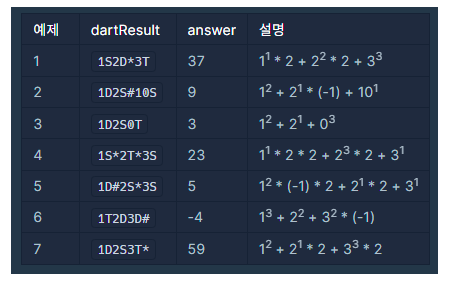

    1	1S2D*3T	37	11 * 2 + 22 * 2 + 33
    2	1D2S#10S	9	12 + 21 * (-1) + 101
    3	1D2S0T	3	12 + 21 + 03
    4	1S*2T*3S	23	11 * 2 * 2 + 23 * 2 + 31
    5	1D#2S*3S	5	12 * (-1) * 2 + 21 * 2 + 31
    6	1T2D3D#	-4	13 + 22 + 32 * (-1)
    7	1D2S3T*	59	12 + 21 * 2 + 33 * 2

In [11]:
def solution(dartResult):
    cur_dic = {'S':1, 'D':2, 'T':3}
    result, before, current= 0,0,0
    isTen = False

    for i in range(len(dartResult)):
        if dartResult[i].isdigit():
            if isTen:
                isTen = False
                continue
            result += before
            before = current
            current = int(dartResult[i])
            if current ==1 and dartResult[i+1]=='0':
                current=10
                non_start=True
        elif dartResult[i].isalpha():
            current = current**cur_dic[dartResult[i]]
        else:
            if dartResult[i] == '*':
                before *=2
                current*=2
            elif dartResult[i] == '#':
                current*=-1

    return result + before + current

In [12]:
print(solution("1S2D*3T"))
print(solution("1D2S#10S"))
print(solution("1D2S0T"))
print(solution("1S*2T*3S"))
print(solution("1D#2S*3S"))
print(solution("1T2D3D#"))
print(solution("1D2S3T*"))

37
9
3
23
5
-4
59


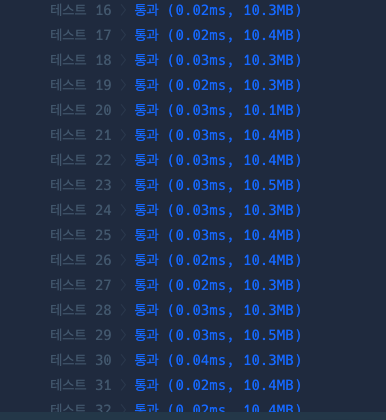
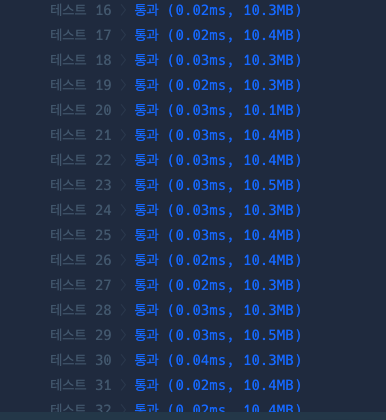

In [27]:
dartResult = "1S2D*3T"

def solution(dartResult):
    tmp_lst = list()
    tmp_score = ''
    idx = -1

    for dart in dartResult:
        if dart.isdigit():
            tmp_score += dart
        elif dart.isalpha():
            if dart =='S':
                tmp_lst.append(int(tmp_score)**1)
                tmp_score = ''
                idx +=1
            elif dart == 'D':
                tmp_lst.append(int(tmp_score)**2)
                tmp_score = ''
                idx +=1
            elif dart == 'T':
                tmp_lst.append(int(tmp_score)**3)
                tmp_score = ''
                idx+=1
        elif dart == '*':
            if idx <1:
                tmp_lst[idx] = tmp_lst[idx] *2
            else:
                tmp_lst[idx] = tmp_lst[idx] * 2
                tmp_lst[idx-1] = tmp_lst[idx-1] * 2

        elif dart =='#':
            tmp_lst[idx] = -(tmp_lst[idx])
        else:
            pass
    
    return sum(tmp_lst)

In [28]:
print(solution("1S2D*3T"))
print(solution("1D2S#10S"))
print(solution("1D2S0T"))
print(solution("1S*2T*3S"))
print(solution("1D#2S*3S"))
print(solution("1T2D3D#"))
print(solution("1D2S3T*"))

37
9
3
23
5
-4
59


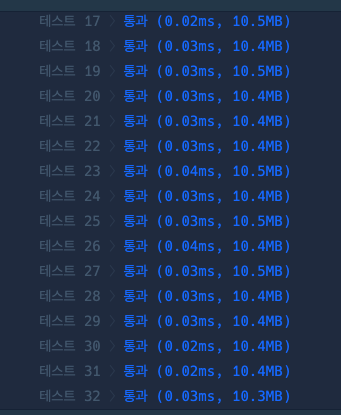
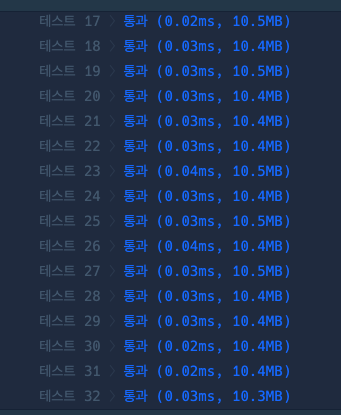